# House Prices: Advanced Regression Techniques

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

<hr>

## Importación de algunas bibliotecas de Python

In [1]:
# datos
import pandas as pd
import numpy as np

# visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
sns.set_palette("deep")

<hr>

## Descargar el conjunto de datos en formato .csv

In [2]:
train_data = pd.read_csv("train.csv")
print(train_data.shape)
train_data.tail()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
test_data = pd.read_csv("test.csv")
print(test_data.shape)
test_data.tail()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


Podemos verificar fácilmente que faltan valores usando el siguiente código.

Se debe manejar cuidadosamente estos valores faltantes antes de crear un modelo de clasificación.

In [4]:
# Mostrando los datos nulos del dataset antes de la primera transformación
print("Valores nulos del dataset: \n\n{}\n".format(train_data.isnull().sum(axis = 0)[train_data.isnull().sum(axis = 0)>0]))

Valores nulos del dataset: 

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64



Como se puede observar, hay demasiados datos nulos en las columnas Alley, PoolQC, Fence y MiscFeature.
Teniendo en cuenta que son 1460 datos en total, lo mejor sería eliminar esas columnas.

In [95]:
df = train_data.drop(["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu"], axis = 1)
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [6]:
# Mostrando los datos nulos del dataset antes de la primera transformación
print("Valores nulos del dataset: \n\n{}\n".format(df.isnull().sum(axis = 0)[df.isnull().sum(axis = 0)>0]))

Valores nulos del dataset: 

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64



In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [69]:
obj_col = df.select_dtypes("object").columns
print(obj_col)

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [71]:
sust = []
for col in obj_col:
    dic = {}
    for i,t in enumerate(df[col].unique()):
        dic[t] = i
    sust.append(dic)

In [101]:
import numpy as np
cleanup_nums = dict()
for i in range(len(obj_col)):
    cleanup_nums[obj_col[i]] = sust[i]

df1 = df.replace(cleanup_nums, inplace = False)
df1.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,0,0,0,2,2010,0,0,210000
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,0,0,2500,5,2010,0,0,266500
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,112,0,0,0,0,4,2010,0,0,142125
1459,1460,20,0,75.0,9937,0,0,0,0,0,...,0,0,0,0,0,6,2008,0,0,147500


In [91]:
def Zscore_outlier(df):
    out = set()
    for i in df: 
        z = (i-np.mean(df))/np.std(df)
        if np.abs(z) > 3: 
            out.add(i)
    return out

In [147]:
df2 = df1.copy()
for col in df1.columns:
    outliers = Zscore_outlier(df1[col])
    df2[col] = df1.loc[~df1[col].isin(outliers)][col]

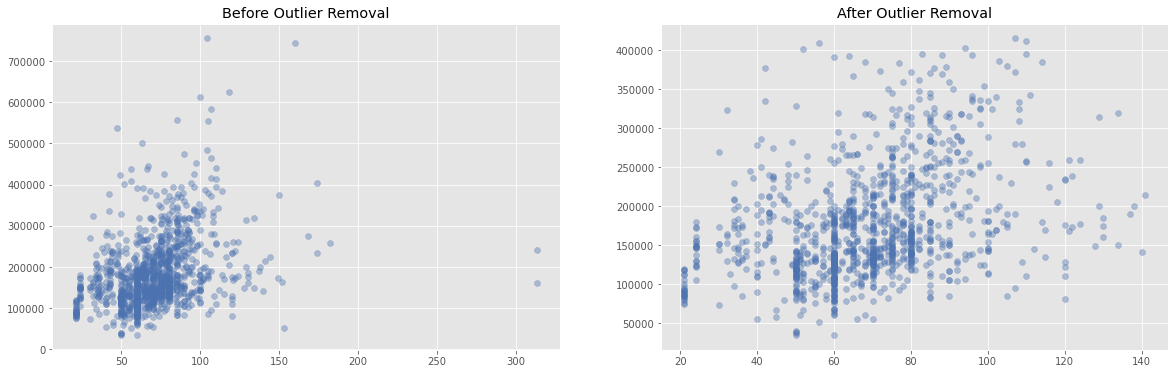

In [184]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))
ax[0].scatter(df1.LotFrontage, df1.SalePrice, alpha = 0.4)
ax[0].set_title("Before Outlier Removal")
ax[1].scatter(df2.LotFrontage, df2.SalePrice, alpha = 0.4)
ax[1].set_title("After Outlier Removal")
plt.show()

In [185]:
df2.isnull().sum(axis = 0)[df2.isnull().sum(axis = 0)>0].max()

271

In [198]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df2)
IterativeImputer(random_state=0)
df3 = pd.DataFrame(imp_mean.transform(df2), columns= df2.columns)
df3.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456.0,60.0,0.0,62.0,7917.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,8.0,2007.0,0.0,0.0,175000.0
1456,1457.0,20.0,0.0,85.0,13175.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,2.0,2010.0,0.0,0.0,210000.0
1457,1458.0,70.0,0.0,66.0,9042.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.163564,5.0,2010.0,0.0,0.0,266500.0
1458,1459.0,20.0,0.0,68.0,9717.0,0.0,0.0,0.0,0.0,0.0,...,112.0,0.0,0.0,0.0,0.000000,4.0,2010.0,0.0,0.0,142125.0
1459,1460.0,20.0,0.0,75.0,9937.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,6.0,2008.0,0.0,0.0,147500.0


In [199]:
print("Valores nulos del dataset: \n\n{}\n".format(df3.isnull().sum(axis = 0)[df3.isnull().sum(axis = 0)>0]))

Valores nulos del dataset: 

Series([], dtype: int64)



[]

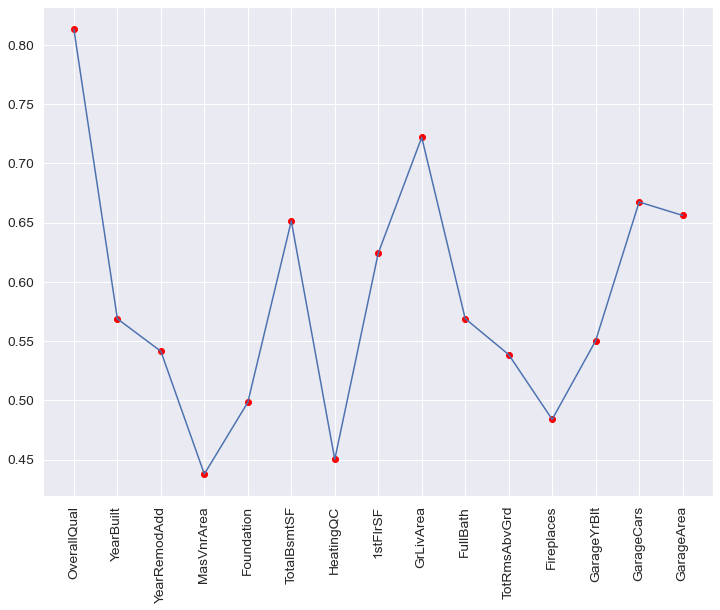

In [204]:
f, ax = plt.subplots(figsize=(12, 9))
df_ = abs(pd.DataFrame(df3.corr().SalePrice[abs(df3.corr().SalePrice) > 0.4][:-1]))
plt.plot(df_)
plt.scatter(df_.index, df_.values, color = "red")
plt.xticks(rotation=90)
plt.plot()

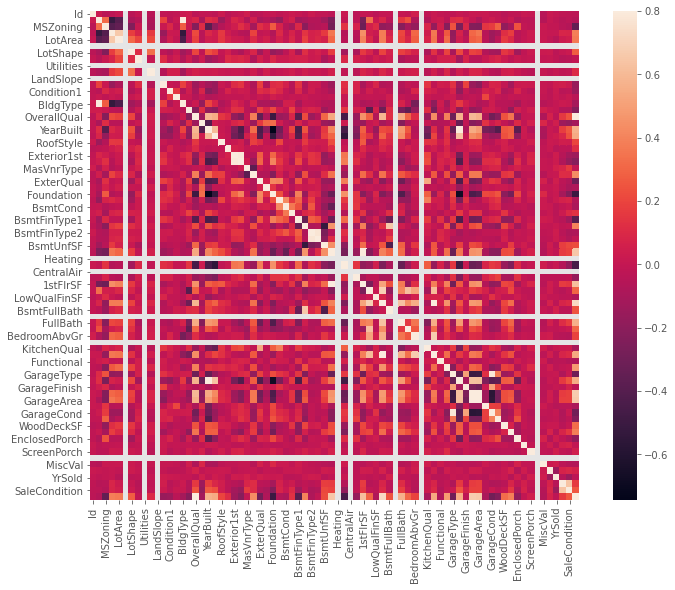

In [202]:
#correlation matrix
corrmat = df3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

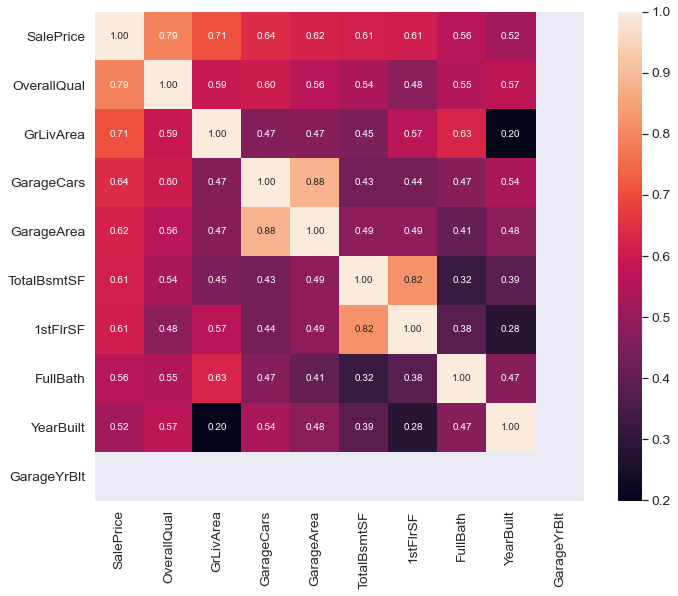

In [203]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9)) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [212]:
features = df3.drop('SalePrice', axis = 1)
target = df3['SalePrice']

In [213]:
from sklearn.preprocessing import StandardScaler

col_names = features.columns
scaler = StandardScaler()
scaler.fit(features)
features = pd.DataFrame(scaler.transform(features), columns = col_names)
features.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1455,1.721374,0.142027,-0.453477,-0.385995,-0.440978,0.0,-0.724218,-0.264065,0.0,-0.590493,...,-0.029858,-0.343156,-0.026531,-0.211285,0.0,-0.160414,0.620891,-0.614439,-0.339792,-0.408609
1456,1.723747,-0.914263,-0.453477,0.765100,0.762075,0.0,-0.724218,-0.264065,0.0,-0.590493,...,-0.779065,-0.343156,-0.026531,-0.211285,0.0,-0.160414,-1.599111,1.645210,-0.339792,-0.408609
1457,1.726120,0.406100,-0.453477,-0.185804,-0.183573,0.0,-0.724218,-0.264065,0.0,-0.590493,...,0.344745,-0.343156,-0.026531,-0.211285,0.0,-0.104566,-0.489110,1.645210,-0.339792,-0.408609
1458,1.728492,-0.914263,-0.453477,-0.085709,-0.029130,0.0,-0.724218,-0.264065,0.0,-0.590493,...,-0.779065,2.388824,-0.026531,-0.211285,0.0,-0.160414,-0.859110,1.645210,-0.339792,-0.408609
1459,1.730865,-0.914263,-0.453477,0.264624,0.021206,0.0,-0.724218,-0.264065,0.0,-0.590493,...,0.494587,-0.343156,-0.026531,-0.211285,0.0,-0.160414,-0.119110,0.138777,-0.339792,-0.408609


In [216]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor

regression_model = SGDRegressor().fit(features, target)

rfe = RFE(estimator=regression_model, step=1)
rfe.fit(features, target)

print("Optimal number of features : %d" % rfe.n_features_)
col = features.columns[rfe.support_]
features = features[col]
print(rfe.ranking_)
features.tail()

Optimal number of features : 37
[30 25  1 19  2 33  7 11 38 28 37  6  1 21  1 24  1  1  1  1 15  1  1  1
  1  1  9  5  1  1 12  1  1  1  1  1 20  1 34  1 32  4  1  1  8  1  3 39
 29 14  1 36  1  1  1  1  1  1  1  1  1 13 31 16  1  1 10 23 18 35 27 26
 17 22  1]


,MSZoning,Condition1,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,...,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SaleCondition
1455,-0.453477,-0.313558,-0.42322,-0.075105,-0.550153,0.925208,0.733308,-0.066241,-0.893321,-0.995287,...,-0.188070,0.624561,-0.616956,0.879991,-1.229033,0.311725,-0.051452,-0.795379,-0.029858,-0.408609
1456,-0.453477,-0.313558,-0.42322,-0.075105,0.431722,0.219868,0.151865,-0.066241,1.990520,0.654150,...,3.949446,2.211404,-0.616956,0.052439,-0.072855,0.311725,0.141179,2.377924,-0.779065,-0.408609
1457,-0.453477,-0.313558,-0.42322,0.653569,1.933233,-1.022872,1.024029,-0.066241,1.578543,1.478869,...,-0.188070,2.211404,-0.616956,-1.405628,-1.229033,-1.026858,-1.053137,-0.795379,0.344745,-0.408609
1458,-0.453477,-0.313558,-0.42322,-0.803779,0.431722,-0.720584,0.539493,-0.066241,-0.481343,-0.582928,...,-0.188070,-0.962282,-0.616956,-1.050963,-0.072855,-1.026858,-1.110926,2.532498,-0.779065,-0.408609
1459,-0.453477,-0.313558,-0.42322,-0.803779,0.431722,-0.216770,-0.962566,-0.066241,0.342611,0.241791,...,-0.188070,-0.962282,-0.616956,-0.459855,1.083323,-1.026858,-0.937558,-0.091109,0.494587,-0.408609


In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=133)

In [232]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor

regression_model = SGDRegressor().fit(X_train, y_train)
scores = cross_val_score(regression_model, features, target, cv=5)
scores.mean()

0.8933927117826617

In [234]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor

regression_model = MLPRegressor().fit(X_train, y_train)
scores = cross_val_score(regression_model, features, target, cv=5)
scores.mean()

-6.253079208872215